# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Daniel Fredrick Genesio
- **Email:** danielfredrickgenesio@gmail.com
- **ID Dicoding:** danielfrdck

## Menentukan Pertanyaan Bisnis

- Diantara Aotizhongxin, Changping, dan Dingling, daerah manakah yang memiliki kadar O3 tinggi sedangkan SO2, NO2, dan CO rendah sehingga cocok untuk dibentuknya sebuah perkebunan kangkung yang memanfaatkan teknologi ozon sebagai disinfektan dan sterilisasi bakteri?
- Jika proses panen kangkung memakan waktu 1 bulan lamanya dengan kondisi temperatur optimal 25°C hingga 30°C dan curah hujan yang tinggi, pada bulan apakah sebaiknya siklus panen dilakukan?


## Import Semua Packages/Library yang Digunakan

Mengimport library yang dipakai

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Menagmbil data daerah Aotizhongxin

In [ ]:
df_aotizhongxin = pd.read_csv('/content/sample_data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df_aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Menagmbil data daerah Changping

In [ ]:
df_changping = pd.read_csv('/content/sample_data/PRSA_Data_Changping_20130301-20170228.csv')
df_changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


Menagmbil data daerah dingling

In [ ]:
df_dingling = pd.read_csv('/content/sample_data/PRSA_Data_Dingling_20130301-20170228.csv')
df_dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


### Assessing Data

Melihat informasi data Aotizhongxin, terdapat banyak data null

In [ ]:
print("""
==========info==========
""")
print(df_aotizhongxin.info())
print("""
==========Data null==========
""")
print(df_aotizhongxin.isnull().sum())
print("""
=====Statistik Data=====
""")
print(df_aotizhongxin.describe(include = 'all'))
print("""
=====Jumlah data terduplikasi=====
""")
print("Jumlah Duplikasi: ",df_aotizhongxin.duplicated().sum())


==========info==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

==========Data null==========

No  

Membuang kolom data yang tidak diperlukan di analisis

In [ ]:
df_aotizhongxin['date'] = pd.to_datetime(df_aotizhongxin[['year', 'month', 'day', 'hour']])
df_aotizhongxin.drop(columns=['PM2.5', 'PM10', 'PRES', 'DEWP', 'wd', 'WSPM'], inplace=True)
df_aotizhongxin.head()


,No,year,month,day,hour,SO2,NO2,CO,O3,TEMP,RAIN,station,date
0,1,2013,3,1,0,4.0,7.0,300.0,77.0,-0.7,0.0,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,7.0,300.0,77.0,-1.1,0.0,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,10.0,300.0,73.0,-1.1,0.0,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,11.0,11.0,300.0,72.0,-1.4,0.0,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,12.0,12.0,300.0,72.0,-2.0,0.0,Aotizhongxin,2013-03-01 04:00:00


Melihat informasi dan deskripsi data Changping yang memiliki banyak data null

In [ ]:
print("""
==========info==========
""")
print(df_changping.info())
print("""
==========Data null==========
""")
print(df_changping.isnull().sum())
print("""
=====Statistik Data=====
""")
print(df_changping.describe(include = 'all'))
print("""
=====Jumlah data terduplikasi=====
""")
print("Jumlah Duplikasi: ",df_changping.duplicated().sum())


==========info==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

==========Data null==========

No  

Mendrop kolom tidak diperlukan dari df_changping

In [ ]:
df_changping['date'] = pd.to_datetime(df_changping[['year', 'month', 'day', 'hour']])
df_changping.drop(columns=['PM2.5', 'PM10', 'PRES', 'DEWP', 'wd', 'WSPM'], inplace=True)
df_changping.head()

,No,year,month,day,hour,SO2,NO2,CO,O3,TEMP,RAIN,station,date
0,1,2013,3,1,0,13.0,7.0,300.0,85.0,-2.3,0.0,Changping,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,6.0,300.0,85.0,-2.5,0.0,Changping,2013-03-01 01:00:00
2,3,2013,3,1,2,22.0,13.0,400.0,74.0,-3.0,0.0,Changping,2013-03-01 02:00:00
3,4,2013,3,1,3,12.0,8.0,300.0,81.0,-3.6,0.0,Changping,2013-03-01 03:00:00
4,5,2013,3,1,4,14.0,8.0,300.0,81.0,-3.5,0.0,Changping,2013-03-01 04:00:00


In [ ]:
print("""
==========info==========
""")
print(df_dingling.info())
print("""
==========Data null==========
""")
print(df_dingling.isnull().sum())
print("""
=====Statistik Data=====
""")
print(df_dingling.describe(include = 'all'))
print("""
=====Jumlah data terduplikasi=====
""")
print("Jumlah Duplikasi: ",df_dingling.duplicated().sum())


==========info==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

==========Data null==========

No  

Mendrop kolom yang tidak dipelukan dari dataset dingling

In [ ]:
df_dingling['date'] = pd.to_datetime(df_dingling[['year', 'month', 'day', 'hour']])
df_dingling.drop(columns=['PM2.5', 'PM10', 'PRES', 'DEWP', 'wd', 'WSPM'], inplace=True)
df_dingling.head()

,No,year,month,day,hour,SO2,NO2,CO,O3,TEMP,RAIN,station,date
0,1,2013,3,1,0,3.0,NaN,200.0,82.0,-2.3,0.0,Dingling,2013-03-01 00:00:00
1,2,2013,3,1,1,3.0,NaN,200.0,80.0,-2.5,0.0,Dingling,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,2.0,200.0,79.0,-3.0,0.0,Dingling,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,NaN,200.0,79.0,-3.6,0.0,Dingling,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,NaN,200.0,81.0,-3.5,0.0,Dingling,2013-03-01 04:00:00


### Cleaning Data

In [ ]:
df_aotizhongxin.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
RAIN         20
station       0
date          0
dtype: int64

Mengisi nilai Null pada data df_aotizhongxin dengan metode interpolasi, karena datanya merupakan time series, sehingga sangat cocok untuk dilakukan interpolasi

In [ ]:
col = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN']
df_aotizhongxininterp = df_aotizhongxin

for tipe in col:
  df_aotizhongxininterp[tipe].interpolate(method='linear', limit_direction='forward', inplace=True)

df_aotizhongxininterp.head()



,No,year,month,day,hour,SO2,NO2,CO,O3,TEMP,RAIN,station,date
0,1,2013,3,1,0,4.0,7.0,300.0,77.0,-0.7,0.0,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,7.0,300.0,77.0,-1.1,0.0,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,10.0,300.0,73.0,-1.1,0.0,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,11.0,11.0,300.0,72.0,-1.4,0.0,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,12.0,12.0,300.0,72.0,-2.0,0.0,Aotizhongxin,2013-03-01 04:00:00


Mendrop data duplikat juga, walaupun sudah 0

In [ ]:
print("""
==========Data null==========
""")
print(df_aotizhongxininterp.isnull().sum())

print("""
=====Jumlah data terduplikasi=====
""")
df_aotizhongxininterp.drop_duplicates(inplace=True)
print("Jumlah Duplikasi: ",df_aotizhongxininterp.duplicated().sum())


==========Data null==========

No         0
year       0
month      0
day        0
hour       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
RAIN       0
station    0
date       0
dtype: int64

=====Jumlah data terduplikasi=====

Jumlah Duplikasi:  0


In [ ]:
df_changping.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
RAIN         51
station       0
date          0
dtype: int64

Mengisi nilai Null pada data df_changping dengan metode interpolasi, karena datanya merupakan time series, sehingga sangat cocok untuk dilakukan interpolasi

In [ ]:
col = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN']
df_changpinginterp = df_changping

for tipe in col:
  df_changpinginterp[tipe].interpolate(method='linear', limit_direction='forward', inplace=True)

df_changpinginterp.head()

,No,year,month,day,hour,SO2,NO2,CO,O3,TEMP,RAIN,station,date
0,1,2013,3,1,0,13.0,7.0,300.0,85.0,-2.3,0.0,Changping,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,6.0,300.0,85.0,-2.5,0.0,Changping,2013-03-01 01:00:00
2,3,2013,3,1,2,22.0,13.0,400.0,74.0,-3.0,0.0,Changping,2013-03-01 02:00:00
3,4,2013,3,1,3,12.0,8.0,300.0,81.0,-3.6,0.0,Changping,2013-03-01 03:00:00
4,5,2013,3,1,4,14.0,8.0,300.0,81.0,-3.5,0.0,Changping,2013-03-01 04:00:00


Mengecek hasil dari interpolasi yang mengisi nilai null serta mendrop nilai duplikasi yang sudah 0.

In [ ]:
print("""
==========Data null==========
""")
print(df_changpinginterp.isnull().sum())

print("""
=====Jumlah data terduplikasi=====
""")
df_changpinginterp.drop_duplicates(inplace=True)
print("Jumlah Duplikasi: ",df_changpinginterp.duplicated().sum())


==========Data null==========

No         0
year       0
month      0
day        0
hour       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
RAIN       0
station    0
date       0
dtype: int64

=====Jumlah data terduplikasi=====

Jumlah Duplikasi:  0


Mengisi nilai Null pada data df_dingling dengan metode interpolasi, karena datanya merupakan time series, sehingga sangat cocok untuk dilakukan interpolasi

In [ ]:
df_dingling.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
RAIN         51
station       0
date          0
dtype: int64

In [ ]:
col = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN']
df_dinglinginterp = df_dingling

for tipe in col:
  df_dinglinginterp[tipe].interpolate(method='linear', limit_direction='forward', inplace=True)

df_dinglinginterp.NO2.fillna(value = df_dinglinginterp.NO2.mean(), inplace = True)

df_dinglinginterp.head()

,No,year,month,day,hour,SO2,NO2,CO,O3,TEMP,RAIN,station,date
0,1,2013,3,1,0,3.0,27.305033,200.0,82.0,-2.3,0.0,Dingling,2013-03-01 00:00:00
1,2,2013,3,1,1,3.0,27.305033,200.0,80.0,-2.5,0.0,Dingling,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,2.000000,200.0,79.0,-3.0,0.0,Dingling,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,2.666667,200.0,79.0,-3.6,0.0,Dingling,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.333333,200.0,81.0,-3.5,0.0,Dingling,2013-03-01 04:00:00


data NO2 pada Dingling kosong diawal, sehingga harus diisi kembali data null tersebut, dan diisi dengan mean.

In [ ]:
print("""
==========Data null==========
""")
print(df_dinglinginterp.isnull().sum())

print("""
=====Jumlah data terduplikasi=====
""")
df_dinglinginterp.drop_duplicates(inplace=True)
print("Jumlah Duplikasi: ",df_dinglinginterp.duplicated().sum())


==========Data null==========

No         0
year       0
month      0
day        0
hour       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
RAIN       0
station    0
date       0
dtype: int64

=====Jumlah data terduplikasi=====

Jumlah Duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore ...

Menggabungkan ketiga data tadi untuk analisis lebih lanjut

In [ ]:
alldata = pd.concat([df_aotizhongxininterp, df_changpinginterp, df_dinglinginterp], ignore_index = True)
alldata.head(10)


,No,year,month,day,hour,SO2,NO2,CO,O3,TEMP,RAIN,station,date
0,1,2013,3,1,0,4.0,7.0,300.0,77.0,-0.7,0.0,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,7.0,300.0,77.0,-1.1,0.0,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,10.0,300.0,73.0,-1.1,0.0,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,11.0,11.0,300.0,72.0,-1.4,0.0,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,12.0,12.0,300.0,72.0,-2.0,0.0,Aotizhongxin,2013-03-01 04:00:00
5,6,2013,3,1,5,18.0,18.0,400.0,66.0,-2.2,0.0,Aotizhongxin,2013-03-01 05:00:00
6,7,2013,3,1,6,18.0,32.0,500.0,50.0,-2.6,0.0,Aotizhongxin,2013-03-01 06:00:00
7,8,2013,3,1,7,19.0,41.0,500.0,43.0,-1.6,0.0,Aotizhongxin,2013-03-01 07:00:00
8,9,2013,3,1,8,16.0,43.0,500.0,45.0,0.1,0.0,Aotizhongxin,2013-03-01 08:00:00
9,10,2013,3,1,9,12.0,28.0,400.0,59.0,1.2,0.0,Aotizhongxin,2013-03-01 09:00:00


Menggrup data gabungan tadi berdasarkan stasiun agar mudah dibaca, lalu mendefinisikan mengisi data dengan mean dari SO2, NO2, CO, dan O3, lalu mengisi frekuensi Rain, atau berapa jam/berapa kali dalam per jam, hujan terjadi. Mengelompokkan temperatur berdasarkan kategori dimana, pada pertanyaan, diberikan statement bahwa kangkung tumbuh pada 25C-30C, sehingga 25-30C ini dikategorikan sebagai optimal, dibawah 25C dikategorikan sebagai dingin, dan diatas 30C sebagai panas.

In [ ]:
alldata.groupby(by = 'station').agg({
    'SO2': 'mean',
    'NO2': 'mean',
    'CO':'mean',
    'O3': 'mean',
    'RAIN': [('freq',lambda x: (x>0).sum()), 'mean'],
    'TEMP' :[('Dingin', lambda x: (x<25).sum()), ('Optimal', lambda x: ((25<=x)&(x<=30)).sum()), ('Panas', lambda x: (x>30).sum())]
})

SO2        NO2           CO         O3  RAIN            \
                   mean       mean         mean       mean  freq      mean   
station                                                                      
Aotizhongxin  17.459251  59.074106  1264.692405  55.328626  1380  0.067383   
Changping     14.943066  44.206153  1156.990246  57.976253  1352  0.060293   
Dingling      11.797849  27.305033   925.111838  70.530792  1352  0.060293   

               TEMP                
             Dingin Optimal Panas  
station                            
Aotizhongxin  28327    4585  2152  
Changping     28297    4574  2193  
Dingling      28297    4574  2193

Dari Hasil diatas, kita dapat lihat bahwa daerah Dingling memiliki kadar O3(ozone) lebih banyak dibanding daerah lainnya sehingga sangat baik bila ingin menggunakan teknologi ozone sebagai disinfektan dan sterilisasi bakteri, selain itu kadar SO2, NO2, dan CO yang berbahaya bagi tumbuhan lebih rendah pada daerah Dingling jika dibandingkan dengan daerah Aotizhongxin dan Changping. Temperatur antara ketiga daerah cenderung sama, tetapi daerah Aotizhongxin memiliki curah hujan yang lebih tinggi dibandingkan kedua daerah lainnya.

Korelasi antara O3 dengan SO2, NO2, dan CO bernilai negatif

In [ ]:
selectdata = ['SO2', 'NO2', 'CO', 'O3', 'RAIN', 'TEMP']
relevandata = alldata[selectdata]
relevandata.corr()

,SO2,NO2,CO,O3,RAIN,TEMP
SO2,1.000000,0.493878,0.527511,-0.203525,-0.039156,-0.337381
NO2,0.493878,1.000000,0.704713,-0.446083,-0.034081,-0.270613
CO,0.527511,0.704713,1.000000,-0.313004,-0.011592,-0.330263
O3,-0.203525,-0.446083,-0.313004,1.000000,0.026457,0.592862
RAIN,-0.039156,-0.034081,-0.011592,0.026457,1.000000,0.035584
TEMP,-0.337381,-0.270613,-0.330263,0.592862,0.035584,1.000000


Mengaplikasikan hal yang sama, tetapi mengkategorikan year dan month, dengan hipotesa bahwa korelasi yang kecil sebelumnya terjadi karena data tidak ditinjau secara musim

In [ ]:
df_aotizhongxininterp.groupby(by = ['year', 'month']).agg({
    'SO2': 'mean',
    'NO2': 'mean',
    'CO':'mean',
    'O3': 'mean',
    'RAIN': [('freq',lambda x: (x>0).sum()), 'mean'],
    'TEMP' :[('Dingin', lambda x: (x<25).sum()), ('Optimal', lambda x: ((25<=x)&(x<=30)).sum()), ('Panas', lambda x: (x>30).sum())]
})

SO2        NO2           CO          O3 RAIN            \
                 mean       mean         mean        mean freq      mean   
year month                                                                 
2013 3      44.945068  74.817409  1477.730511   46.810691   21  0.026210   
     4      24.796646  53.501374   910.012500   48.888799   18  0.015139   
     5      30.442204  61.016129   944.528226   74.441171   17  0.007796   
     6      14.627276  72.798322  1295.164583   68.616993   62  0.130694   
     7       9.285232  55.105382   820.551747   71.028915   82  0.293817   
     8       6.918246  56.345503   776.948925   70.153281   48  0.158065   
     9      13.816619  64.157682  1064.438889   37.193487   52  0.078333   
     10     22.425482  73.610596  1099.395161   20.690349    9  0.003763   
     11     25.961111  59.951389  1459.166667   18.827889    0  0.000000   
     12     42.289866  62.154011  1793.615591   14.920455    0  0.000000   
2014 1      58.357527  66.719758  1863.306452   15.747312    0  0.000000   
     2      57.367560  67.565476  2140.848214   19.979167   21  0.008482   
     3      36.616935  68.692204  1386.424731   37.056452    3  0.001210   
     4      19.891667  67.380556   888.333333   57.127778   12  0.016667   
     5      15.475403  56.231855   801.075269   79.354032   32  0.085887   
     6       6.297222  51.293056   698.958333   88.940972   41  0.263194   
     7       4.495296  48.717070   801.478495   89.793683   29  0.081586   
     8       4.037097  54.896774   719.758065   83.083871   45  0.109812   
     9       5.545833  64.637639   910.555556   42.565972   63  0.093889   
     10     10.828629  88.706317  1304.704301   24.981183   23  0.017742   
     11     17.151667  78.901111  1596.666667   16.357639    2  0.000972   
     12     24.392473  44.961022  1199.798387   25.713710    0  0.000000   
2015 1      37.946909  69.083871  2046.908602   19.239247    1  0.000269   
     2      30.427083  56.623512  1506.398810   45.990327   19  0.010417   
     3      22.835820  61.189315  1249.798387   54.010887    6  0.008871   
     4       9.659583  54.643472   816.736111   77.348056   24  0.055694   
     5       8.680780  47.819892   762.836022  100.590726   24  0.050134   
     6       7.338194  45.457639  1046.597222  102.018750   65  0.136250   
     7       5.737231  52.339382   844.287634  120.805780   73  0.270161   
     8       4.158602  43.236559   869.690860   96.649866   42  0.125806   
     9       5.818750  59.830556   990.277778   64.310417   87  0.137222   
     10      6.366935  72.106183  1181.989247   41.480511   22  0.019086   
     11     10.518056  78.543056  2443.437500   16.640278   99  0.052222   
     12     23.540995  89.807124  3475.907258   22.650538    8  0.002823   
2016 1      22.913306  55.765457  1807.661290   32.936828    3  0.000672   
     2      18.127874  33.321121  1007.686782   51.647989   15  0.018103   
     3      22.306452  48.479167  1375.470430   51.286290    0  0.000000   
     4      11.411806  35.535417   762.916667   74.820833    9  0.006667   
     5       9.450941  30.793011   660.147849   99.416667   34  0.045833   
     6       5.504167  28.195139   735.208333  116.873611   49  0.099167   
     7       3.440860  34.737903   847.782258  104.488575   77  0.423387   
     8       2.682796  39.455645   754.301075   89.969086   28  0.072446   
     9       3.039583  48.530556   681.319444   61.986806   32  0.159861   
     10      3.317876  64.008737  1128.830645   24.444892   55  0.117473   
     11      9.785417  74.543056  1942.222222   16.587500   17  0.007361   
     12     18.055780  86.272177  2546.639785   17.877016    0  0.000000   
2017 1      20.395161  71.297715  2059.879032   40.645833    3  0.000403   
     2      21.305804  60.618304  1230.877976   54.953869    8  0.006101   

             TEMP                
           Dingin Optimal Panas  
year month                       
2013 3        744       0     0  
     

In [ ]:
df_changpinginterp.groupby(by = ['year', 'month']).agg({
    'SO2': 'mean',
    'NO2': 'mean',
    'CO':'mean',
    'O3': 'mean',
    'RAIN': [('freq',lambda x: (x>0).sum()), 'mean'],
    'TEMP' :[('Dingin', lambda x: (x<25).sum()), ('Optimal', lambda x: ((25<=x)&(x<=30)).sum()), ('Panas', lambda x: (x>30).sum())]
})

SO2        NO2           CO          O3 RAIN            \
                 mean       mean         mean        mean freq      mean   
year month                                                                 
2013 3      34.977695  59.389822  1386.262097   59.846282   23  0.031048   
     4      16.716323  36.718789   776.124306   67.423397   17  0.015556   
     5      23.327701  37.745094   776.693548   94.222195   10  0.005376   
     6      14.018699  31.729585  1091.112311   82.689592   66  0.146806   
     7       6.550281  24.684136   823.671554   81.049275   67  0.229301   
     8       7.047229  23.858521   783.938172   90.407391   38  0.105511   
     9       6.754640  41.941972   967.076389   54.058819   47  0.122361   
     10     12.535789  55.517531   962.701613   29.795191    7  0.005376   
     11     24.884737  47.651766  1102.291667   26.514037    0  0.000000   
     12     44.077830  50.180957  1554.905914   24.871095    0  0.000000   
2014 1      57.946909  56.318548  2293.615591   25.971102    0  0.000000   
     2      62.394345  60.231399  2166.592262   26.008929   13  0.003720   
     3      34.607527  53.670027  1308.064516   44.068548    6  0.004435   
     4      15.792361  49.172917   879.097222   76.508333   11  0.010972   
     5      12.308737  36.318548   744.354839   95.679301   33  0.085484   
     6       5.326389  31.391667   692.291667  108.078472   35  0.105139   
     7       5.544355  32.655242   878.830645  116.195565   20  0.070699   
     8       4.777823  35.984140   746.908602  108.978629   32  0.058871   
     9       5.346528  35.160833   913.263889   65.335694   62  0.084722   
     10      6.497984  56.986559  1260.685484   31.378360   27  0.028898   
     11     17.812639  56.530139  1502.847222   26.133750    0  0.000000   
     12     29.315188  48.201613  1433.669355   29.086022    0  0.000000   
2015 1      37.275538  63.211694  2050.336022   25.015054    3  0.000403   
     2      28.745536  44.521577  1418.824405   40.013393   21  0.007143   
     3      20.896909  47.599126  1151.075269   52.712231    0  0.000000   
     4       6.109028  36.102778   678.333333   76.321528   19  0.037778   
     5       6.018817  28.278898   636.491935   92.122984   33  0.052823   
     6       4.554861  24.233333   772.708333   92.921528   46  0.103333   
     7       4.264785  23.262097   604.569892  101.969086   81  0.364516   
     8       2.750000  22.390457   502.352151   90.334677   24  0.098118   
     9       4.153472  38.105556   736.319444   59.193056   96  0.208333   
     10      4.882392  48.393145   876.075269   42.089382   23  0.014113   
     11      7.538889  59.472917  1870.763889   12.144444  110  0.094167   
     12     14.055780  76.894489  2657.056452   13.317876   14  0.004167   
2016 1      16.430108  55.337366  1495.430108   29.397849    2  0.000403   
     2      13.023707  43.884339   943.893678   45.063937    9  0.007759   
     3      12.563844  60.393145  1142.338710   44.449597    0  0.000000   
     4       7.497917  43.351389   746.111111   63.173611   11  0.012222   
     5       6.170430  34.459812   593.534946   85.960215   36  0.048656   
     6       3.941250  31.724861   649.527778   98.939722   51  0.080139   
     7       3.088710  27.223790   956.384409   95.612903   94  0.366667   
     8       2.894489  27.816532   879.502688   78.080645   34  0.065323   
     9       3.323611  36.924306   792.777778   56.137500   34  0.072778   
     10      3.428495  53.518145  1166.061828   23.586694   63  0.110215   
     11     10.006528  61.882639  1797.777778   13.276389   28  0.012778   
     12     15.423387  69.604839  2364.650538   14.276210    0  0.000000   
2017 1      17.094086  55.395833  1901.344086   29.389785    0  0.000000   
     2      15.697917  46.164435  1131.026786   37.019345    6  0.002976   

             TEMP                
           Dingin Optimal Panas  
year month                       
2013 3        744       0     0  
     

In [ ]:
df_dinglinginterp.groupby(by = ['year', 'month']).agg({
    'SO2': 'mean',
    'NO2': 'mean',
    'CO':'mean',
    'O3': 'mean',
    'RAIN': [('freq',lambda x: (x>0).sum()), 'mean'],
    'TEMP' :[('Dingin', lambda x: (x<25).sum()), ('Optimal', lambda x: ((25<=x)&(x<=30)).sum()), ('Panas', lambda x: (x>30).sum())]
})

SO2        NO2           CO          O3 RAIN            \
                 mean       mean         mean        mean freq      mean   
year month                                                                 
2013 3      24.388040  45.965999  1014.571237   67.862266   23  0.031048   
     4      13.649715  25.760235   641.643314   73.477840   17  0.015556   
     5      17.421060  26.811988   765.424481   97.996905   10  0.005376   
     6       7.789619  20.783876  1131.507765   80.729314   66  0.146806   
     7       4.081229  15.846520   820.550953   79.995946   67  0.229301   
     8       4.807796  12.202285   692.741935   84.992448   38  0.105511   
     9       5.463483  22.078757   866.105556   53.863477   47  0.122361   
     10     11.345827  37.195026  1500.000000   37.355611    7  0.005376   
     11     19.334163  40.763562   941.180556   33.497127    0  0.000000   
     12     30.965642  40.164652  1020.833333   35.186482    0  0.000000   
2014 1      37.049731  38.662634  1183.064516   34.735887    0  0.000000   
     2      37.619048  43.989583  1790.178571   29.022321   13  0.003720   
     3      22.844086  30.081317  1099.865591   64.826613    6  0.004435   
     4      11.447222  30.062500   684.583333   94.102778   11  0.010972   
     5       9.233003  17.715677   454.588221  108.568353   33  0.085484   
     6       4.231313  13.698106   449.772727  114.428535   35  0.105139   
     7       4.863038  16.454973   787.701613  124.010148   20  0.070699   
     8       4.608199  18.647312   656.653226  112.322849   32  0.058871   
     9       5.157639  19.740417   710.694444   70.079444   62  0.084722   
     10      6.530242  35.149194  1012.500000   42.636425   27  0.028898   
     11     15.718056  38.600000   982.222222   35.097778    0  0.000000   
     12     20.635529  26.950269   940.300179   39.818996    0  0.000000   
2015 1      27.902240  44.888844  1460.707885   31.632616    3  0.000403   
     2      23.548363  27.604167  1201.413690   54.146577   21  0.007143   
     3      14.795161  26.600067   896.505376   71.447581    0  0.000000   
     4       6.503194  20.560347   528.263889   93.048958   19  0.037778   
     5       6.607527  15.971102   542.809140  108.935484   33  0.052823   
     6       6.744444  15.535694   633.263889  106.259028   46  0.103333   
     7       4.914651  17.339382   481.653226  103.188172   81  0.364516   
     8       5.745968  13.968414   613.104839  103.370968   24  0.098118   
     9       3.838889  17.435417   586.597222   78.138889   96  0.208333   
     10      7.866263  25.055780   842.271505   62.678763   23  0.014113   
     11     12.604167  45.202083  1749.652778   15.825694  110  0.094167   
     12     15.479167  51.493280  2042.405914   23.955645   14  0.004167   
2016 1      15.485887  29.844086  1336.223118   45.577957    2  0.000403   
     2       9.655891  14.520115   670.258621   67.017960    9  0.007759   
     3      12.381720  33.669355   995.497312   64.893817    0  0.000000   
     4       7.008333  26.356944   670.138889   84.320139   11  0.012222   
     5       3.990591  18.961022   467.405914  114.639785   36  0.048656   
     6       3.394444  20.166667   556.250000  115.318750   51  0.080139   
     7       2.612231  14.526882   694.495751  170.293683   94  0.366667   
     8       2.214382   8.603495   634.939733   81.790323   34  0.065323   
     9       3.015278  12.404167   450.138889   70.347917   34  0.072778   
     10      2.991263  24.923387   854.569892   36.811828   63  0.110215   
     11      9.015278  44.575000  1326.388889   26.111806   28  0.012778   
     12     14.186828  55.314516  1764.986559   26.543683    0  0.000000   
2017 1      13.906586  40.237903  1410.954301   46.698925    0  0.000000   
     2      12.536458  27.665179   875.967262   61.714286    6  0.002976   

             TEMP                
           Dingin Optimal Panas  
year month                       
2013 3        744       0     0  
     

Melakukan pembuktian hipotesa tadi, dimana akan ditinjau perbulan karena harus mengkodisikan musim

In [ ]:
alldata.groupby(by = ['station', 'month' ]).agg({
    'SO2': 'mean',
    'NO2': 'mean',
    'CO':'mean',
    'O3': 'mean',
    'RAIN': [('freq',lambda x: (x>0).sum()), 'mean'],
    'TEMP' :[('Dingin', lambda x: (x<25).sum()), ('Optimal', lambda x: ((25<=x)&(x<=30)).sum()), ('Panas', lambda x: (x>30).sum())]
})

SO2        NO2           CO          O3 RAIN  \
                         mean       mean         mean        mean freq   
station      month                                                       
Aotizhongxin 1      34.903226  65.716700  1944.438844   27.142305    7   
             2      31.686025  54.344395  1467.348820   43.218105   63   
             3      31.676069  63.294524  1372.356015   47.291080   30   
             4      16.439925  52.765205   844.499653   64.546367   63   
             5      16.012332  48.965222   792.146841   88.450649  107   
             6       8.441715  49.436039   943.982118   94.112582  217   
             7       5.739655  47.724934   828.525034   96.529238  261   
             8       4.449185  48.483620   780.174731   84.964026  163   
             9       7.055196  59.289108   911.647917   51.514170  234   
             10     10.734731  74.607958  1178.729839   27.899234  109   
             11     15.854062  72.984653  1860.373264   17.103327  118   
             12     27.069778  70.798583  2253.990255   20.290430    8   
Changping    1      32.186660  57.565860  1935.181452   27.443448    5   
             2      29.815450  48.657817  1410.914454   37.097529   49   
             3      25.761494  55.263030  1246.935148   50.269165   29   
             4      11.528907  41.336468   769.916493   70.856717   58   
             5      11.956421  34.200588   687.768817   91.996174  112   
             6       6.960300  29.769862   801.410022   95.657328  198   
             7       4.862033  26.956316   815.864125   98.706707  262   
             8       4.367385  27.512412   728.175403   91.950336  128   
             9       4.894563  38.033167   852.359375   58.681267  239   
             10      6.836165  53.603845  1066.381048   31.712407  120   
             11     15.060698  56.384365  1568.420139   19.517155  138   
             12     25.718046  61.220474  2002.570565   20.387801   14   
Dingling     1      23.586111  38.408367  1347.737455   39.661346    5   
             2      20.740966  28.321534  1130.346608   53.099558   49   
             3      18.602252  34.079185  1001.609879   67.257569   29   
             4       9.652116  25.685007   631.157356   86.237429   58   
             5       9.313045  19.864947   557.556939  107.535132  112   
             6       5.539955  17.546086   692.698595  104.183907  198   
             7       4.117787  16.041939   696.100386  119.371987  262   
             8       4.344086  13.355376   649.359933   95.619147  128   
             9       4.368822  17.914689   653.384028   68.107432  239   
             10      7.183399  30.580847  1052.335349   44.870657  120   
             11     14.167916  42.285161  1249.861111   27.633101  138   
             12     20.316791  43.480679  1442.131496   31.376202   14   

                               TEMP                
                        mean Dingin Optimal Panas  
station      month                                 
Aotizhongxin 1      0.000336   2976       0     0  
             2      0.010841   2712       0     0  
             3      0.009073   2972       4     0  
             4      0.023542   2726     142    12  
             5      0.047413   2132     663   181  
             6      0.157326   1572     912   396  
             7      0.267238   1028    1184   764  
             8      0.116532   1101    1141   734  
             9      0.117326   2303     512    65  
             10     0.039516   2949      27     0  
             11     0.015139   2880       0     0  
             12     0.000706   2976       0     0  
Changping    1      0.000202   2976       0     0  
             2      0.005420   2712       0     0  
             3      0.008871   2972       4     0  
             4      0.019132   2703     161    16  
             5      0.048085   2105     663   208  
             6      0.108854   1564     901   415  
             7      0.257796    966    1240   7

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Disini agar dara lebih simple, kita akan langsung membandingkan rata-rata dari seluruh kandungan unsur ini di setiap daerah, dapat dilihat bahwa Dingling memiliki O3 tertinggi dan SO2, NO2, dan CO terendah, hal ini sangat cocok untuk dengan yang kita harapkan pada bagian pertanyaan tadi.

In [ ]:
df_visual = alldata.groupby(by = 'station').agg({
    'SO2':['mean'],
    'NO2': 'mean',
    'CO':'mean',
    'O3': 'mean',
})
print(df_visual)

                    SO2        NO2           CO         O3
                   mean       mean         mean       mean
station                                                   
Aotizhongxin  17.459251  59.074106  1264.692405  55.328626
Changping     14.943066  44.206153  1156.990246  57.976253
Dingling      11.797849  27.305033   925.111838  70.530792


In [ ]:
df_visual.corr()

,,SO2,NO2,CO,O3
,,mean,mean,mean,mean
SO2,mean,1.000000,0.999632,0.989649,-0.956569
NO2,mean,0.999632,1.000000,0.985392,-0.948310
CO,mean,0.989649,0.985392,1.000000,-0.988501
O3,mean,-0.956569,-0.948310,-0.988501,1.000000


Dari korelasi antara mean ini, terlihat jelas hubungan antara keempatnya, dimana O3 berkorelasi negatif dengan unsur lainnya, ini menguatkan hipotesa bahwa semakin besar O3 dari suatu daerah, maka semakin kecil unsur lainnya

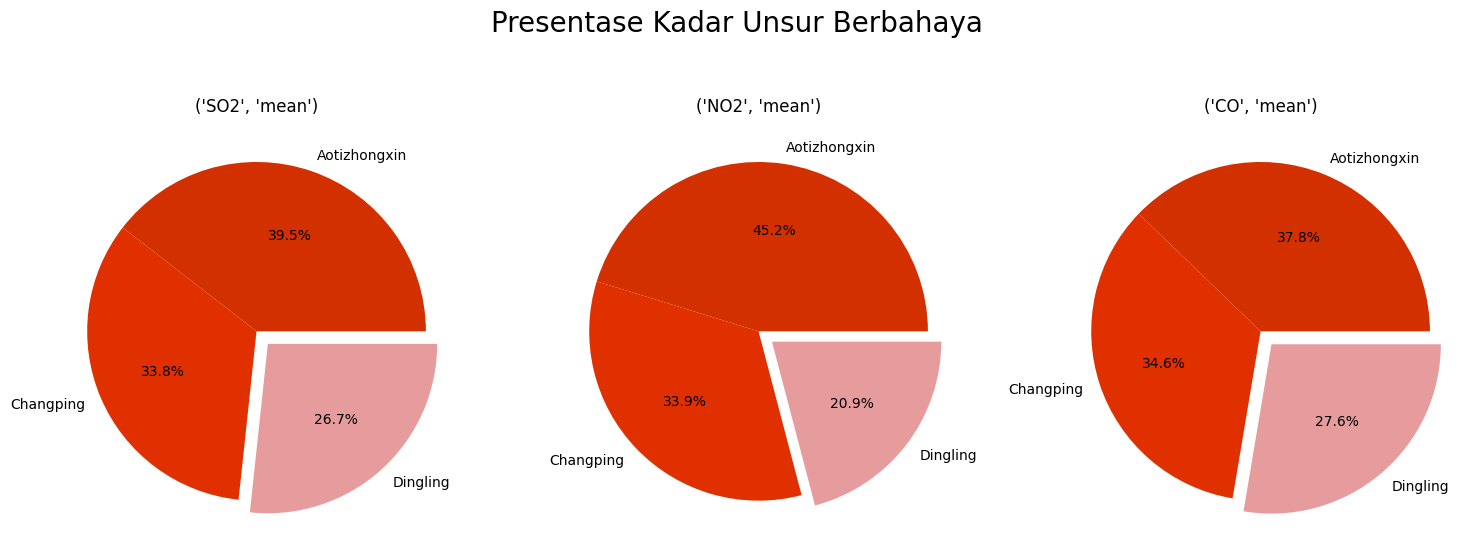

In [ ]:
colors = ['#D33000', '#E03000', '#E69C9C']
col = ['SO2', 'NO2', 'CO']
explode = (0, 0, 0.1)
labels = df_visual.index
fig, axes = plt.subplots(nrows=1, ncols=(len(df_visual[col])), figsize=(15, 5))
for i, kandungan in enumerate(df_visual[col]):
    axes[i].pie(df_visual[kandungan],
                labels=labels,
                colors=colors,
                autopct='%1.1f%%',
                explode=explode)
    axes[i].set_title(kandungan)


plt.suptitle("Presentase Kadar Unsur Berbahaya", fontsize=20, y=1.1)
plt.tight_layout()
plt.show()


Ini merupakan gambaran perbandingan presentase dari Kadar Unsur Berbahaya(SO2, NO2, CO) telihat jelas bahwa Dingling mempunyai presentase terkecil diantara ketiganya

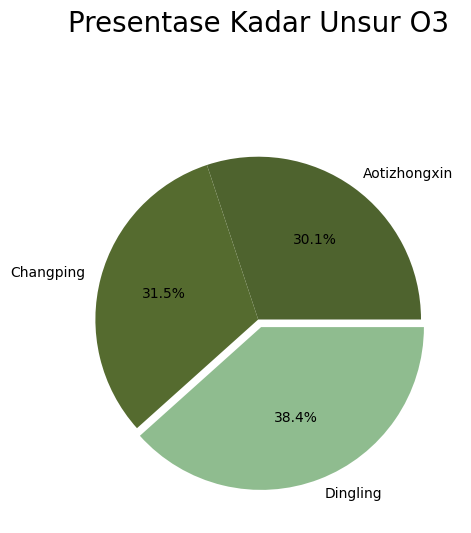

In [ ]:
colors = ['#4E632E', '#556B2F', '#8FBC8F']
colO3 = 'O3'
explode = (0, 0, 0.05)
labels = df_visual.index


data = df_visual[colO3].values.flatten()

plt.pie(data,
         labels=labels,
         colors=colors,
         autopct='%1.1f%%',
         explode=explode)

plt.suptitle("Presentase Kadar Unsur O3", fontsize=20, y=1.1)
plt.tight_layout()
plt.show()


Disini Kita akan menggunakan O3 untuk membuat teknologi ozon sebagai disinfektan, sehingga kadar O3 yang tinggi justru dibutuhkan, sesuai hipotesa dan pembuktian korelasi tadim O3 pada Dingling merupakan yang tertinggi diantara ketiganya.

### Pertanyaan 2:

Sama seperti diatas tadi, kita akan membuat dataframe yang berisi frekuensi dan mean dari Hujan disetiap bulannya(agar dapat mengetehaui impact dari musim), lalu jumlah dari ketiga kategori Temperature yang sudah dipaparkan sebelumnya

In [ ]:
dinglingdf = df_dinglinginterp.groupby(by = 'month').agg({
    'RAIN': [('freq',lambda x: (x>0).sum()), 'mean'],
    'TEMP' :[('Dingin', lambda x: (x<25).sum()), ('Optimal', lambda x: ((25<=x)&(x<=30)).sum()), ('Panas', lambda x: (x>30).sum())]
})
dinglingdf = dinglingdf.rename(index={1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
                                      7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November',
                                      12: 'Desember'})
print(dinglingdf)

          RAIN             TEMP              
          freq      mean Dingin Optimal Panas
month                                        
Januari      5  0.000202   2976       0     0
Februari    49  0.005420   2712       0     0
Maret       29  0.008871   2972       4     0
April       58  0.019132   2703     161    16
Mei        112  0.048085   2105     663   208
Juni       198  0.108854   1564     901   415
Juli       262  0.257796    966    1240   770
Agustus    128  0.081956   1142    1108   726
September  239  0.122049   2352     470    58
Oktober    120  0.039651   2949      27     0
November   138  0.026736   2880       0     0
Desember    14  0.001042   2976       0     0


Dibawah ini kita bisa melihat peningkatan antara korelasi Hujan dan Temperatur setelah dipecah-pecah setiap bulannya, dari sinilah kita bisa menyimpulkan bahwa ada hubungan kuat antara Hujan dan Temperatur setiap bulannya

In [ ]:
dinglingdf.corr()

RAIN                TEMP                    
                  freq      mean    Dingin   Optimal     Panas
RAIN freq     1.000000  0.887672 -0.703207  0.724437  0.605685
     mean     0.887672  1.000000 -0.822425  0.829931  0.784826
TEMP Dingin  -0.703207 -0.822425  1.000000 -0.989506 -0.973243
     Optimal  0.724437  0.829931 -0.989506  1.000000  0.952552
     Panas    0.605685  0.784826 -0.973243  0.952552  1.000000

Akan dipaparkan Frekuensi Hujan setiap bulannya

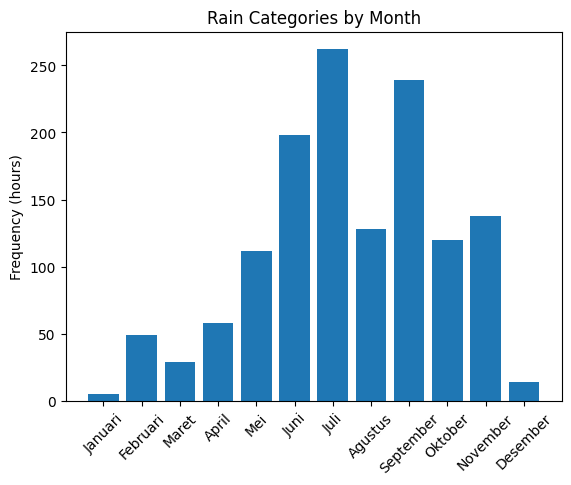

In [ ]:
plt.bar(x = dinglingdf.index, height = dinglingdf['RAIN']['freq'])
plt.xticks(rotation=45)
plt.ylabel('Frequency (hours)')
plt.title('Rain Categories by Month')
plt.show()

Disini kita akan membandingkan rasio antara ketiga kategori temperatur, yaitu dingin(suhu dibawah 25C), optimal(suhu 25C-30C) dan Panas(suhu diatas 30C), dari visualisasi ini, sama dengan data hujan, bulan Juli lah merupakan yang terbaik, dimana jumlah temperatur optimalnya lebih besar dibandingkan dengan dingin ataupun panas.

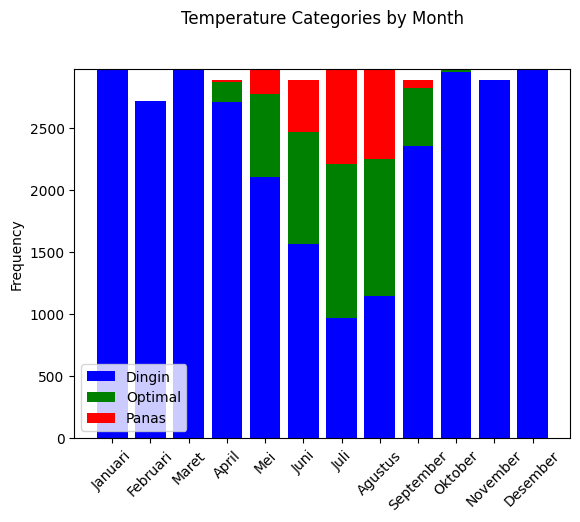

In [ ]:
temp = dinglingdf['TEMP']
plt.bar(temp.index, temp['Dingin'], color='blue', label='Dingin')
plt.bar(temp.index, temp['Optimal'], bottom=temp['Dingin'], color='green', label='Optimal')
plt.bar(temp.index, temp['Panas'], bottom=temp['Dingin'] + temp['Optimal'], color='red', label='Panas')
plt.ylabel('Frequency')
plt.title('Temperature Categories by Month', y = 1.1)
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Conclusion

- Conclution pertanyaan 1
Daerah Dingling merupakan daerah yang memiliki kandungan O3 tertinggi dan juga kandungan SO2, NO2, dan CO terendah.
Oleh sebab itu daerah DINGLING, merupakan daerah yang paling cocok untuk dibentuknya sebuah perkebunan kangkung yang memanfaatkan teknologi ozon sebagai disinfektan dan sterilisasi bakteri.

- Conclution pertanyaan 2
Hal ini karena, curah hujan bulan Juli merupakan yang tertinggi dan jumlah temperatur Optimal(25°C- 30°C) terbanyak